In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize
import numpy as np

In [2]:
conda install -c conda-forge proj

Fetching package metadata ...............
Solving package specifications: .

Package plan for installation in environment C:\Users\SUBHANKAR\Anaconda3\envs\tf:

The following packages will be SUPERSEDED by a higher-priority channel:

    proj: 7.0.1-hf5a9257_1 --> 7.0.1-haa36216_1 conda-forge


Note: you may need to restart the kernel to use updated packages.


In [4]:
#conda install -c conda-forge geopandas

In [2]:
conda install basemap

Fetching package metadata .............
Solving package specifications: .

Package plan for installation in environment C:\Users\SUBHANKAR\Anaconda3\envs\tf:

Note: you may need to restart the kernel to use updated packages.

The following packages will be UPDATED:

    basemap: 1.2.0-py36h4e5d7af_0                   --> 1.3.0-py36ha7665c8_0      
    geos:    3.6.2-h9ef7328_2                       --> 3.8.0-h33f27b4_0          
    pyproj:  2.6.1.post1-py36ha1e340d_1             --> 2.6.1.post1-py36hcfa1391_1
    shapely: 1.6.4-py36hc90234e_0                   --> 1.7.0-py36h210f175_0      

The following packages will be SUPERSEDED by a higher-priority channel:

    proj:    7.0.1-haa36216_1           conda-forge --> 6.2.1-h9f7ef89_0          



In [4]:
conda install -c conda-forge basemap-data-hires

Fetching package metadata ...............
Solving package specifications: .
Note: you may need to restart the kernel to use updated packages.

Package plan for installation in environment C:\Users\SUBHANKAR\Anaconda3\envs\tf:

The following packages will be UPDATED:

    basemap-data-hires: 1.2.0-0 --> 1.2.1-0 conda-forge




In [7]:
#pip install pillow

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


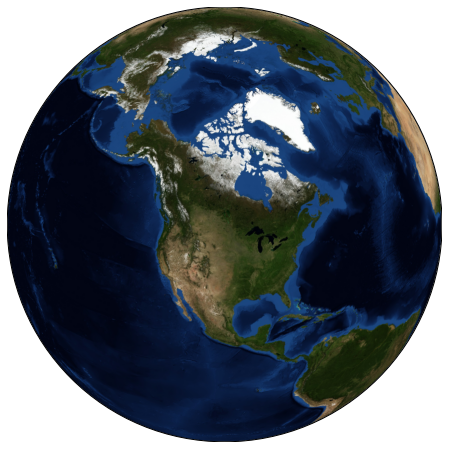

In [2]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

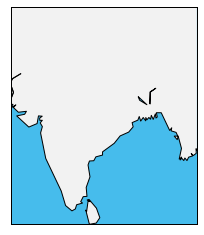

In [2]:

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

In [29]:
path = 'C:\\Users\\SUBHANKAR\\Amit LockDown\\Polarization\\Polarization_New\\'
df = pd.read_csv(path+'five_only_500_301_followers_tweets_504479.csv')
df.shape

(499856, 37)

In [30]:
from datetime import datetime
x = []
for i in df['tweet_created_at']:
    try:
        i = ''.join(i.split()[0])
        x.append(datetime.strptime(i,  '%Y-%m-%d'))
    except:
        a = i.split("-")
        a = a[-1]+"-"+a[1]+"-"+a[0]
        x.append(datetime.strptime(a,  '%Y-%m-%d'))
        
    
df['modified_date'] = x


In [31]:
start = datetime(2020,1,1)
df =  df[df['modified_date'] >= start]

In [32]:
df2 = pd.read_csv("city_india.csv")   # All city in India
df2.shape

(1215, 3)

In [33]:
df.shape

(410362, 37)

In [9]:
df.isnull().sum()

user_screen_name                       0
user_id                                0
name                                   0
tweet_id                               0
tweet_text                             0
tweet_created_at                       0
retweet_count                          0
retweeted                              0
truncated                              0
language                               0
hashtag                                0
hashtag_count                          0
user_mentions                      88124
user_mentions_count                    0
url                                    0
favourites_count                       0
follower_count                         0
in_reply_status_id                311261
in_reply_user_id                  299556
in_reply_screen_name              299556
user_location                     115440
user_city                         115440
user_state                             0
possibly_sensitive                     0
statuses_count  

In [10]:
df['user_location'].value_counts()

India                            22828
Pune, India                       9793
Mumbai, India                     8372
Bengaluru South, India            6954
Manchester, England               6148
Bronx, NY                         5876
Hyderabad, India                  5835
Kampala Uganda                    5620
Mumbai                            5524
Karnataka, India                  5346
London, England                   5199
Kampala, Uganda                   4974
Tamil Nadu                        4950
Dhakoli Village, Rajpura          4894
Lagos, Nigeria                    4826
Pakistan                          4451
Nairobi, Kenya                    4234
Chennai, India                    3334
INDIA                             3168
ahmedabad                         3143
NAIROBI,Tel:+254711840083         3112
New Jersey, USA                   3078
NEW DELHI                         3068
Half Moon Bay, Eastern            3021
الامارات                          3006
Punjab, India            

In [11]:
# influence = []
# for i in range(len(df3)):
#     for j in range(len(df)):
#         if df3['PNG_user_id'].iloc[i] == df['user_id'].iloc[j]:
#             influence.append(j)
# print(len(influence))

In [12]:
df2.head()

,Name of City,State,lat & lon
0,Mumbai,Maharashtra,"(79.208824, 17.123184)"
1,Delhi,Delhi,"(77.12, 28.88)"
2,Bengaluru,Karnataka,"(75.7139, 15.3173)"
3,Ahmedabad,Gujarat,"(71.1924, 22.2587)"
4,Hyderabad,Telangana,"(79.0193, 18.1124)"


In [38]:
df.dropna(subset = ["user_location"], inplace = True)

In [39]:
a = df['user_location'].unique()
a = [i.lower() for i in a]
a

['nairobi, kenya',
 'mumbai, india',
 'noida, india',
 'india ',
 'vandavasi, tamil nadu',
 'yamunanagar, india',
 'मुंबई, भारत',
 'patna, india',
 'arusha tz! mzumbe university',
 'pakistan',
 'india',
 'bengaluru south, india',
 'kolkata, india',
 'chhatarpur mp',
 'tamil nadu',
 'awara ',
 'azamgarh, u.p.',
 'across india',
 'raebareli',
 'الامارات',
 'simulation c137',
 'kampala uganda ',
 'lucknow, india',
 'liberty, mo ',
 'são paulo',
 'coimbatore',
 'pune, india',
 'new delhi',
 'jalpaiguri, india',
 'islamic republic of iran',
 'new delhi',
 'embu, brasil',
 'झुंझनूं, भारत',
 'narasaraopet, india',
 '神奈川県横浜市',
 'भारत',
 'australia',
 'mumbai',
 'dhakoli village, rajpura',
 'johannesburg',
 'yeditha {ap}',
 'bengaluru, india',
 'ranchi, india',
 '中华人民共和国',
 'new delhi',
 'jaipur ',
 'yusufguda/peddammagudi\\mvp',
 'new delhi, india',
 'mumbai, india.',
 'brasília, brasil',
 'punjab , india',
 'são paulo, brasil',
 'mumbai,india',
 'lawrence, usa',
 'punjab, india',
 'jamnagar, 

In [14]:
txt = a.iloc[4]
if txt.find(','):
    txt = txt.split(",")
    txt = txt[0]
print(txt)

Nairobi


In [41]:
city = df2['Name of City']
city = list(city)
city = [i.lower() for i in city]

In [42]:
city

['mumbai',
 'delhi',
 'bengaluru',
 'ahmedabad',
 'hyderabad',
 'chennai',
 'kolkata',
 'pune',
 'jaipur',
 'surat',
 'lucknow',
 'kanpur',
 'nagpur',
 'patna',
 'indore',
 'thane',
 'bhopal',
 'visakhapatnam',
 'vadodara',
 'firozabad',
 'ludhiana',
 'rajkot',
 'agra',
 'siliguri',
 'nashik',
 'faridabad',
 'patiala',
 'meerut',
 'kalyan-dombivali',
 'vasai-virar',
 'varanasi',
 'srinagar',
 'dhanbad',
 'jodhpur',
 'amritsar',
 'raipur',
 'allahabad',
 'coimbatore',
 'jabalpur',
 'gwalior',
 'vijayawada',
 'madurai',
 'guwahati',
 'chandigarh',
 'hubli-dharwad',
 'amroha',
 'moradabad',
 'gurgaon',
 'aligarh',
 'solapur',
 'ranchi',
 'jalandhar',
 'tiruchirappalli',
 'bhubaneswar',
 'salem',
 'warangal',
 'mira-bhayandar',
 'thiruvananthapuram',
 'bhiwandi',
 'saharanpur',
 'guntur',
 'amravati',
 'bikaner',
 'noida',
 'jamshedpur',
 'bhilai nagar',
 'cuttack',
 'kochi',
 'udaipur',
 'bhavnagar',
 'dehradun',
 'asansol',
 'nanded-waghala',
 'ajmer',
 'jamnagar',
 'ujjain',
 'sangli',


In [52]:
b=[]
for j in range(50000,len(df)):
    for i in range(len(df2)):
        txt = df['user_location'].iloc[j].lower()
        #print(txt)
#         if  type(txt) == float :
#             txt2 = " " 
#             print(df['user_location'].iloc[j])
#             break
        if txt.find(","):
            #print(txt,j)
            txt = txt.split(",")
            txt = txt[0]
        #print(txt)
        if  type(txt) != float and  txt == df2.iloc[i][0].lower() or txt == df2.iloc[i][1].lower():
            txt2 =df2.iloc[i][1]  #store store replace by city
            print(txt2 ,j)
            break
        if txt not in city:
            txt2 = " "
            
    print(txt, txt2)    
    b.append(txt2)

dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli village  
dhakoli vi

KeyboardInterrupt: 

In [49]:
df

398

In [19]:
df['State Name'] = b

In [20]:
freq =df['State Name'].value_counts(dropna=False)
freq

                     1088
Maharashtra            87
Delhi                  72
Uttar Pradesh          54
Karnataka              39
Tamil Nadu             36
West Bengal            21
Telangana              20
Gujarat                16
Kerala                 14
Assam                  12
Haryana                10
Chandigarh              8
Andhra Pradesh          8
Madhya Pradesh          5
Karnatka                5
Odisha                  4
Bihar                   4
Uttarakhand             4
Goa                     4
Rajasthan               4
Jharkhand               2
Jammu and Kashmir       2
Punjab                  2
Name: State Name, dtype: int64

In [21]:
freq.iloc[1]

87

In [22]:
df4 = df['State Name'].value_counts().rename_axis('State Name').reset_index(name='counts')
print(df4)

           State Name  counts
0                        1088
1         Maharashtra      87
2               Delhi      72
3       Uttar Pradesh      54
4           Karnataka      39
5          Tamil Nadu      36
6         West Bengal      21
7           Telangana      20
8             Gujarat      16
9              Kerala      14
10              Assam      12
11            Haryana      10
12         Chandigarh       8
13     Andhra Pradesh       8
14     Madhya Pradesh       5
15           Karnatka       5
16             Odisha       4
17              Bihar       4
18        Uttarakhand       4
19                Goa       4
20          Rajasthan       4
21          Jharkhand       2
22  Jammu and Kashmir       2
23             Punjab       2


In [23]:
df4.drop(df4[df4['State Name'] == ' '].index, inplace = True)  # delete null count row

In [24]:
print(df4.shape)
df4.head()

(23, 2)


,State Name,counts
1,Maharashtra,87
2,Delhi,72
3,Uttar Pradesh,54
4,Karnataka,39
5,Tamil Nadu,36


In [25]:
df4[df4['State Name'] == 'Maharashtra'].index.values

array([1], dtype=int64)

In [26]:
influ_state = []
for i in range(len(influence)):
    #print(df['State Name'].iloc[influence[i]] ,influence[i] )
    try:
        p = df['State Name'].iloc[influence[i]]
        k = df4[df4['State Name'] == p].index.values
        r = df4.iloc[k[0]-1][1]   # -1 for 1st row deleted
        influ_state.append((p,r))
    except:
        #print(df['State Name'].iloc[influence[i]])
        pass

In [27]:
influ_state

[('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Madhya Pradesh', 5),
 ('Madhya Pradesh', 5),
 ('Uttarakhand', 4),
 ('Uttarakhand', 4),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Gujarat', 16),
 ('Gujarat', 16),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Uttarakhand', 4),
 ('Uttarakhand', 4),
 ('Assam', 12),
 ('Assam', 12),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Haryana', 10),
 ('Haryana', 10),
 ('Haryana', 10),
 ('Tamil Nadu', 36),
 ('Tamil Nadu', 36),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 7

In [28]:
sat_list = []
for i in range(len(df4)):
    sat_list.append((df4.iloc[i][0],df4.iloc[i][1]))
print(sat_list)

[('Maharashtra', 87), ('Delhi', 72), ('Uttar Pradesh', 54), ('Karnataka', 39), ('Tamil Nadu', 36), ('West Bengal', 21), ('Telangana', 20), ('Gujarat', 16), ('Kerala', 14), ('Assam', 12), ('Haryana', 10), ('Chandigarh', 8), ('Andhra Pradesh', 8), ('Madhya Pradesh', 5), ('Karnatka', 5), ('Odisha', 4), ('Bihar', 4), ('Uttarakhand', 4), ('Goa', 4), ('Rajasthan', 4), ('Jharkhand', 2), ('Jammu and Kashmir', 2), ('Punjab', 2)]


In [29]:
influ_state[0][0]

'Telangana'

(36,
 5,
 [68.18624877929699, 6.754255771636906, 0.0, 0.0],
 [97.41516113281256, 35.50133132934571, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x20c83dd2f48>)

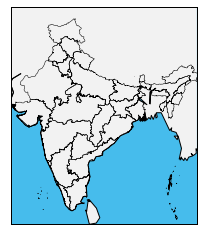

In [3]:
fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA/IND_adm1','INDIA')

In [5]:
 for area in m.INDIA_info:
        print(area)
        

{'ID_0': 105, 'ISO': 'IND', 'NAME_0': 'India', 'ID_1': 1, 'NAME_1': 'Andaman and Nicobar', 'TYPE_1': 'Union Territor', 'ENGTYPE_1': 'Union Territory', 'NL_NAME_1': '', 'VARNAME_1': 'Andaman & Nicobar Islands|Andaman et Nicobar|Iihas de Andama e Nicobar|Inseln Andamanen und Nikobare', 'RINGNUM': 1, 'SHAPENUM': 1}
{'ID_0': 105, 'ISO': 'IND', 'NAME_0': 'India', 'ID_1': 1, 'NAME_1': 'Andaman and Nicobar', 'TYPE_1': 'Union Territor', 'ENGTYPE_1': 'Union Territory', 'NL_NAME_1': '', 'VARNAME_1': 'Andaman & Nicobar Islands|Andaman et Nicobar|Iihas de Andama e Nicobar|Inseln Andamanen und Nikobare', 'RINGNUM': 2, 'SHAPENUM': 1}
{'ID_0': 105, 'ISO': 'IND', 'NAME_0': 'India', 'ID_1': 1, 'NAME_1': 'Andaman and Nicobar', 'TYPE_1': 'Union Territor', 'ENGTYPE_1': 'Union Territory', 'NL_NAME_1': '', 'VARNAME_1': 'Andaman & Nicobar Islands|Andaman et Nicobar|Iihas de Andama e Nicobar|Inseln Andamanen und Nikobare', 'RINGNUM': 3, 'SHAPENUM': 1}
{'ID_0': 105, 'ISO': 'IND', 'NAME_0': 'India', 'ID_1': 1, 

[('Maharashtra', 87), ('Delhi', 72), ('Uttar Pradesh', 54), ('Karnataka', 39), ('Tamil Nadu', 36), ('West Bengal', 21), ('Telangana', 20), ('Gujarat', 16), ('Kerala', 14), ('Assam', 12), ('Haryana', 10), ('Chandigarh', 8), ('Andhra Pradesh', 8), ('Madhya Pradesh', 5), ('Karnatka', 5), ('Odisha', 4), ('Bihar', 4), ('Uttarakhand', 4), ('Goa', 4), ('Rajasthan', 4), ('Jharkhand', 2), ('Jammu and Kashmir', 2), ('Punjab', 2)]


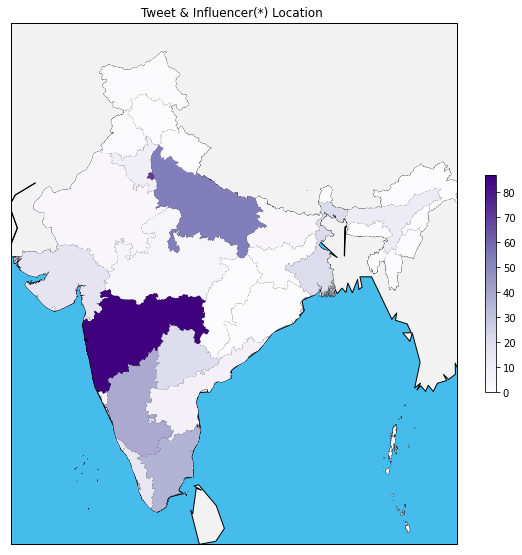

In [34]:
'''
sat_list = []

for key, group in states_group:
    sat = 0

    for row in group.iterrows():
        sat += row[1][4]
    sat_list.append((key,sat))
print(sat_list)
'''

sat_list = []
for i in range(len(df4)):
    sat_list.append((df4.iloc[i][0],df4.iloc[i][1]))
print(sat_list)

fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA/IND_adm1','INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['NAME_1']
    sat1 = 0
    
    for x in sat_list:
        if x[0] == state:
            sat1 = x[1]
            break
    satlist.append(sat1)

df_poly = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'satlist': satlist})
    
shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Purples')
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly['satlist'].fillna(0).values)))
ax.add_collection(pc)

for i in range(len(influ_state)):
    for j in range(len(df2)):
        if influ_state[i][0] == df2['State'].iloc[j] :
            lon_lat = df2['lat & lon'].iloc[j]
            lon_lat = lon_lat.split(",")
            p,q = lon_lat[0], lon_lat[1]
            p = p.replace("'","")
            p = p.replace("'","")
            p = p.replace("(","")
            p = p.replace(")","")
            p = p.replace(" ","")
            p = float(p)
            q = q.replace("'","")
            q = q.replace("'","")
            q = q.replace("(","")
            q = q.replace(")","")
            q = q.replace(" ","")
            q = float(q)
            #print(p,q,df2['State'].iloc[j])
            x, y = m(p,q)
            size =20
            m.plot(x, y, '*', markersize=size, color='r', alpha=0.5)
            break

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)

plt.colorbar(mapper, shrink=0.4)

ax.set_title('Tweet & Influencer(*) Location ')
plt.rcParams['figure.figsize'] = [10,10]
plt.show()

In [31]:
influ_state

[('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Telangana', 20),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Madhya Pradesh', 5),
 ('Madhya Pradesh', 5),
 ('Uttarakhand', 4),
 ('Uttarakhand', 4),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Gujarat', 16),
 ('Gujarat', 16),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('West Bengal', 21),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Uttarakhand', 4),
 ('Uttarakhand', 4),
 ('Assam', 12),
 ('Assam', 12),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Haryana', 10),
 ('Haryana', 10),
 ('Haryana', 10),
 ('Tamil Nadu', 36),
 ('Tamil Nadu', 36),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Maharashtra', 87),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 72),
 ('Delhi', 7

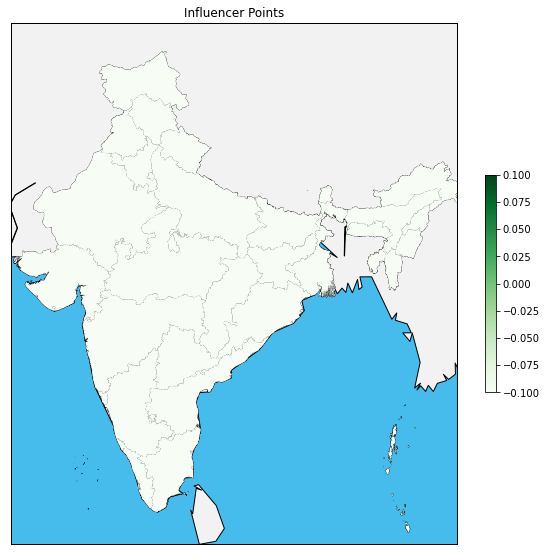

In [32]:

# Influencer point 

influ_state = []
for i in range(len(influence)):
    #print(df['State Name'].iloc[influence[i]] ,influence[i] )
    try:
        p = df['State Name'].iloc[influence[i]]
        k = df3[df3['State Name'] == p].index.values
        r = df3.iloc[k[0]-1][1]   # -1 for 1st row deleted
        influ_state.append((p,r))
    except:
        #print(df['State Name'].iloc[influence[i]])
        pass


fig, ax = plt.subplots() 
m = Basemap(resolution='c', projection='merc', lat_0=54.5, lon_0=-4.36, llcrnrlon=68., llcrnrlat=6., urcrnrlon=97., urcrnrlat=37.)

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()

m.readshapefile('INDIA/IND_adm1','INDIA')

satlist = []

for state_info in m.INDIA_info:
    state = state_info['NAME_1']
    sat1 = 0
    
    for x in influ_state:
        #print(x[0],state)
        if x[0] == state:
            #print(state)
            sat1 = x[1]
            break
    satlist.append(sat1)


df_poly2 = pd.DataFrame({'shapes':[Polygon(np.array(shape), True) for shape in m.INDIA],
                       'area':[area['NAME_1'] for area in m.INDIA_info],
                       'satlist': satlist})

shapes = [Polygon(np.array(shape), True) for shape in m.INDIA]
cmap = plt.get_cmap('Greens')
pc = PatchCollection(shapes, zorder=2)

norm = Normalize()
pc.set_facecolor(cmap(norm(df_poly2['satlist'].fillna(0).values)))
ax.add_collection(pc)

mapper = matplotlib.cm.ScalarMappable(cmap=cmap)
mapper.set_array(satlist)

plt.colorbar(mapper, shrink=0.4)
ax.set_title('Influencer Points')
plt.rcParams['figure.figsize'] = [7,7]
plt.show()


In [ ]:
df_poly2